## Importing packages

In [1]:
#load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, RocCurveDisplay
from sklearn import model_selection
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as mp
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from helper import getRecessionSpan
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/Dataset_Cleaned.csv')

Label = df["Regime"].apply(lambda regime: 1. if regime == 'Normal' else 0.)
df.insert(loc=2, column="Label", value=Label.values)

df.head()

,Date,Regime,Label,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,...,CES3000000008 3M lag,CES3000000008 6M lag,CES3000000008 9M lag,CES3000000008 12M lag,CES3000000008 18M lag,INVEST 3M lag,INVEST 6M lag,INVEST 9M lag,INVEST 12M lag,INVEST 18M lag
0,9/1/1960,Recession,0.0,-0.084688,-0.257957,-0.092590,-0.160677,-0.464545,-0.392415,-0.284028,...,-0.002347,-0.202089,0.814792,0.614534,0.206420,-0.329913,-0.393223,-0.291795,-0.335801,-0.453899
1,10/1/1960,Recession,0.0,-0.064692,-0.149393,-0.089541,-0.128591,-0.174981,0.059112,0.012991,...,-0.002347,-0.001828,-0.408592,-0.415509,-0.215215,-0.222892,-0.311128,-0.339558,-0.348070,-0.349708
2,11/1/1960,Recession,0.0,-0.152577,-0.486983,-0.293861,-0.205091,-0.572996,-0.467670,-0.449252,...,0.197664,-0.001828,-0.204695,0.202517,-0.215215,-0.303207,-0.298369,-0.405463,-0.332572,-0.412914
3,12/1/1960,Recession,0.0,-0.155672,-0.489957,-0.510380,-0.181525,-0.717643,-0.580421,-0.482081,...,-0.002347,-0.001828,-0.204695,0.820542,0.206420,-0.264023,-0.331857,-0.390894,-0.302234,-0.461335
4,1/1/1961,Normal,1.0,0.007250,0.060300,-0.147482,-0.155058,-0.102725,-0.166652,-0.185062,...,-0.202358,-0.001828,-0.000798,-0.415509,-0.215215,-0.220317,-0.223187,-0.308305,-0.350478,-0.343032


In [3]:
df.tail()

,Date,Regime,Label,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,...,CES3000000008 3M lag,CES3000000008 6M lag,CES3000000008 9M lag,CES3000000008 12M lag,CES3000000008 18M lag,INVEST 3M lag,INVEST 6M lag,INVEST 9M lag,INVEST 12M lag,INVEST 18M lag
762,3/1/2024,Normal,1.0,0.119664,0.278915,0.483777,0.405058,-0.418930,-0.555117,-0.533721,...,-0.002347,2.601573,2.242072,2.880628,1.049690,2.801808,-1.543739,-1.592808,-6.632158,-3.951560
763,4/1/2024,Normal,1.0,-0.005487,-0.045290,-0.219147,-0.342350,-0.234051,-0.188022,0.069423,...,-3.202523,-2.204705,-2.243667,-0.827526,1.049690,0.646354,-2.577352,-1.421391,-5.831855,-5.081173
764,5/1/2024,Normal,1.0,0.306004,0.948146,0.681999,0.126965,0.894061,0.490711,0.246629,...,1.197719,4.203666,-2.039770,0.614534,0.417237,-0.285672,-0.973814,-2.537414,-1.826925,-2.897736
765,6/1/2024,Normal,1.0,0.017581,-0.030418,0.041591,-0.500012,-0.052536,0.136202,-0.092685,...,-0.602380,-0.001828,2.649867,2.262602,-1.269303,4.143487,2.848102,-1.548328,-1.616380,-0.754031
766,7/1/2024,Normal,1.0,-0.002552,-0.061649,0.462430,1.251048,-1.449490,-1.442046,-1.442152,...,-0.402369,-3.206013,-2.243667,-2.269586,1.260507,-2.484299,0.659448,-2.588156,-1.443232,-1.160406


 I will perform a classification with 2 binary outputs using logistic regression, $L_1$ regularized logistic regression, and XGBoost. Split the dataset based on time: period over 1960 - 2002 for training, and period over 2002 - 2024 for validation. 

## Feature Selection with $L_1$ Penalty <a id="3"></a>

In [4]:
# Time Series Split
split_date = '1/1/2002'
df_idx = df[df.Date == split_date].index[0]

df_targets=df['Label'].values
df_features=df.drop(['Regime','Date','Label'], axis=1)

df_training_features = df.iloc[:df_idx,:].drop(['Regime','Date','Label'], axis=1)
df_validation_features = df.iloc[df_idx:, :].drop(['Regime','Date','Label'], axis=1)

df_training_targets = df['Label'].values
df_training_targets=df_training_targets[:df_idx]

df_validation_targets = df['Label'].values
df_validation_targets=df_validation_targets[df_idx:]

In [5]:
print(len(df_training_features),len(df_training_targets),len(df_targets))
print(len(df_validation_features),len(df_validation_targets),len(df_features))

496 496 767
271 271 767


In [6]:
scoring="roc_auc"
kfold= TimeSeriesSplit(n_splits=3)
seed=8

# Create regularization hyperparameter space
C = np.reciprocal([0.00000001, 0.00000005, 0.0000001, 0.0000005, 0.000001, 0.000005, 0.00001, 0.00005, 
                         0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000])

# Create hyperparameter options
hyperparameters = dict(C=C)

model=LogisticRegression(max_iter=10000,penalty='l1', solver='liblinear')
LR_penalty=model_selection.GridSearchCV(estimator=model, param_grid= hyperparameters,
                                        cv=kfold, scoring=scoring).fit(X=df_features,
                                                                       y=df_targets).best_estimator_

LR_penalty

LogisticRegression(C=0.1, max_iter=10000, penalty='l1', solver='liblinear')

In [7]:
X=df_features
y=df_targets
lr_l1 = LogisticRegression(C=0.1, max_iter=10000,penalty="l1", solver='liblinear').fit(X,y)
model = SelectFromModel(lr_l1,prefit=True)
feature_idx = model.get_support()
feature_name = X.columns[feature_idx]
X_new = model.transform(X)
X_new.shape

(767, 37)

In [8]:
feature_name


Index(['IPFPNSS', 'MANEMP', 'AWOTMAN', 'AWHMAN', 'HOUST', 'HOUSTS', 'BUSLOANS',
       'S&P 500', 'FEDFUNDS', 'TB3MS', 'BAA', 'TB3SMFFM', 'WPSID62',
       'IPDMAT 3M lag', 'USFIRE 3M lag', 'USFIRE 12M lag', 'USFIRE 18M lag',
       'HOUSTS 18M lag', 'AMDMUOx 12M lag', 'S&P 500 3M lag', 'S&P 500 6M lag',
       'FEDFUNDS 3M lag', 'TB3MS 6M lag', 'AAA 3M lag', 'TB3SMFFM 3M lag',
       'T1YFFM 6M lag', 'T5YFFM 6M lag', 'T10YFFM 6M lag', 'T10YFFM 9M lag',
       'T10YFFM 12M lag', 'EXJPUSx 18M lag', 'EXUSUKx 12M lag',
       'WPSID62 9M lag', 'OILPRICEx 9M lag', 'CPIAPPSL 12M lag',
       'CPIAPPSL 18M lag', 'CUSR0000SAD 6M lag'],
      dtype='object')

In [9]:
lr_l1.coef_[0][feature_idx]

array([ 0.05499126,  0.1844524 ,  0.02982124,  0.18388206,  0.44775005,
        0.08020522,  0.1295027 ,  0.1640881 ,  0.07955283,  0.08322141,
       -0.03239051,  0.34709948,  0.04089505,  0.01765563,  0.0569883 ,
        0.02035402,  0.08844876, -0.06607648, -0.06859939,  0.0363847 ,
        0.0699468 ,  0.00155681,  0.05889897, -0.01443976,  0.40083594,
        0.09183722,  0.13946454,  0.28490168,  0.03126224,  0.25601457,
        0.06330168,  0.05695092, -0.08434025, -0.06548132,  0.04832474,
        0.13474604,  0.38503158])

In [10]:
print(len(lr_l1.coef_[0][feature_idx]))
print(len(feature_name))

37
37


In [11]:
df_2=df[feature_name]
df_2.insert(loc=0, column="Date", value=df['Date'].values)
df_2.insert(loc=1, column="Regime", value=df['Regime'].values)
df_2.insert(loc=2, column="Label", value=df['Label'].values)

df_2.head()
df_2.shape

(767, 40)

<Axes: >

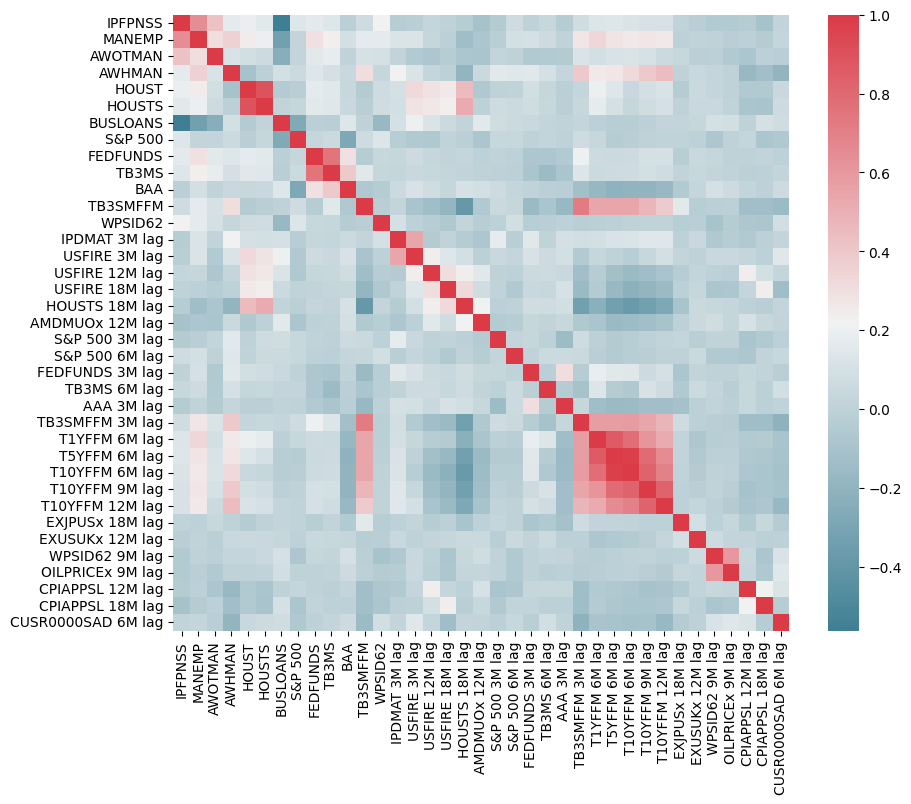

In [12]:
corr = df_2.drop(['Date','Regime','Label'],axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

## Training Algorithms on Training Dataset

In [13]:
df=df_2
df.shape

(767, 40)

In [14]:
# Time Series Split
df_idx = df[df.Date == split_date].index[0]

df_targets=df['Label'].values
df_features=df.drop(['Regime','Date','Label'], axis=1)

df_training_features = df.iloc[:df_idx,:].drop(['Regime','Date','Label'], axis=1)
df_validation_features = df.iloc[df_idx:, :].drop(['Regime','Date','Label'], axis=1)

df_training_targets = df['Label'].values
df_training_targets=df_training_targets[:df_idx]

df_validation_targets = df['Label'].values
df_validation_targets=df_validation_targets[df_idx:]

LR: 0.872090 (0.058958)
LR_L1: 0.886534 (0.055025)
LR_L2: 0.917171 (0.022847)
LDA: 0.846654 (0.017859)
KNN: 0.856948 (0.049163)
GB: 0.902521 (0.047255)
ABC: 0.931682 (0.027615)
RF: 0.927488 (0.030905)
XGB: 0.932822 (0.047480)
SVM: 0.930475 (0.029295)
DT: 0.656610 (0.127174)


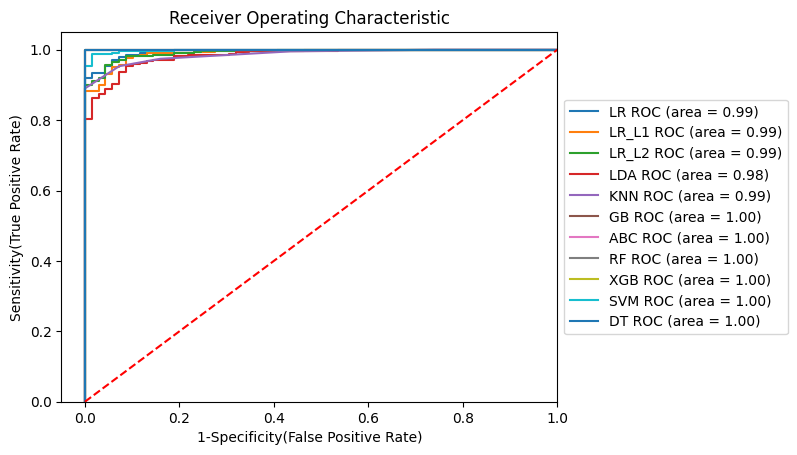

In [15]:
seed=8
scoring='roc_auc' 
kfold = model_selection.TimeSeriesSplit(n_splits=3) 
models = []

models.append(('LR', LogisticRegression(C=1e09)))
models.append(('LR_L1', LogisticRegression(penalty = 'l1', solver='liblinear')))
models.append(('LR_L2', LogisticRegression(penalty = 'l2')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('SVM', SVC(probability=True)))
models.append(('DT', DecisionTreeClassifier()))

results = []
names = []
lb = preprocessing.LabelBinarizer()

for name, model in models:
    cv_results = model_selection.cross_val_score(estimator = model, X = df_training_features, 
                                                 y = lb.fit_transform(df_training_targets), cv=kfold, scoring = scoring)
    
    model.fit(df_training_features, df_training_targets) # train the model
    fpr, tpr, thresholds = roc_curve(df_training_targets, model.predict_proba(df_training_features)[:,1])
    auc = roc_auc_score(df_training_targets,model.predict_proba(df_training_features)[:,1])
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, auc))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show() 
warnings.filterwarnings('ignore')

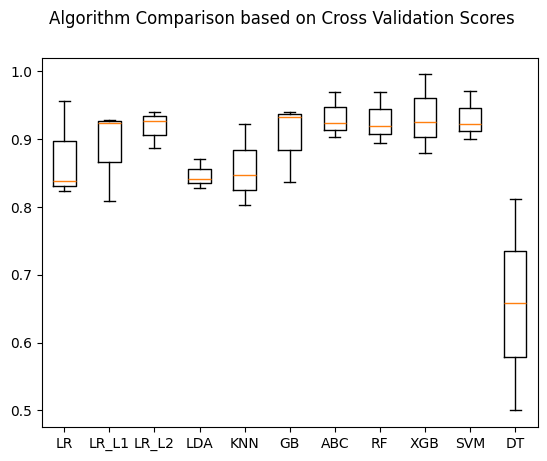

In [16]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison based on Cross Validation Scores')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Testing Performances of the Algorithms on Testing Dataset 

In [17]:
import datetime
# define periods of recession
rec_spans = rec_spans = getRecessionSpan(df)
print(rec_spans)

[('9/1/1960', '1/1/1961'), ('11/1/1969', '10/1/1970'), ('10/1/1973', '2/1/1975'), ('12/1/1979', '6/1/1980'), ('6/1/1981', '10/1/1982'), ('6/1/1990', '2/1/1991'), ('2/1/2001', '10/1/2001'), ('11/1/2007', '5/1/2009'), ('1/1/2020', '3/1/2020')]


In [18]:
# Logistic Regression
model=LogisticRegression(C=1e09) # high penalty 
LR=model.fit(df_training_features,df_training_targets)
training_predictions=LR.predict(df_training_features)
prob_predictions = LR.predict_proba(df_training_features)
prob_predictions = np.append(prob_predictions, LR.predict_proba(df_validation_features), axis=0)

In [19]:
print(prob_predictions)

[[9.47529997e-01 5.24700035e-02]
 [8.85299002e-01 1.14700998e-01]
 [8.07239192e-01 1.92760808e-01]
 ...
 [9.99410301e-01 5.89698560e-04]
 [2.37565759e-02 9.76243424e-01]
 [9.91436081e-01 8.56391937e-03]]


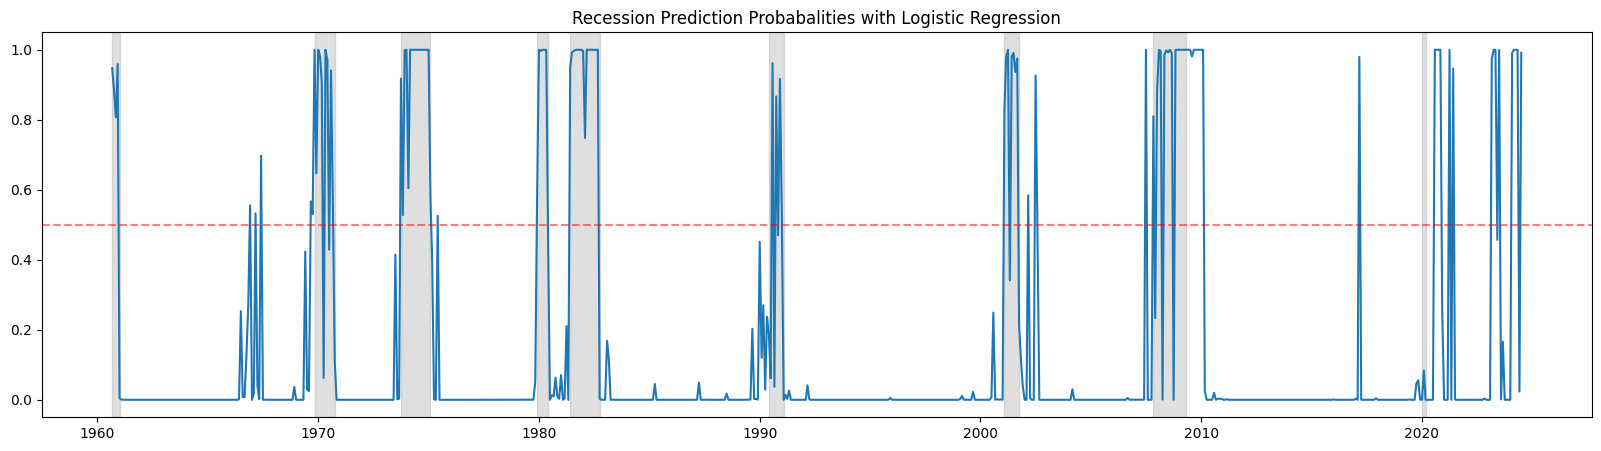

In [20]:
sample_range = pd.date_range(start='9/1/1960', end='7/1/2024', freq='MS')

plt.figure(figsize=(20,5))
plt.plot(sample_range.to_series().values, prob_predictions[:,0])

for i in range( len(rec_spans)):
    plt.axvspan(datetime.datetime.strptime(rec_spans[i][0], '%m/%d/%Y'), datetime.datetime.strptime(rec_spans[i][len(rec_spans[i]) - 1], '%m/%d/%Y'), alpha=0.25, color='grey')
plt.axhline(y=0.5, color='r', ls='dashed', alpha = 0.5)
plt.title('Recession Prediction Probabalities with Logistic Regression')
mp.savefig('assets/lr.png',  bbox_inches='tight')
plt.show()

## Logistic Regression with Regularization


In [21]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.reciprocal([0.00000001, 0.00000005, 0.0000001, 0.0000005, 0.000001, 0.000005, 0.00001, 0.00005, 
                         0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000])

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)


model=LogisticRegression(max_iter=10000)
LR_penalty=model_selection.GridSearchCV(estimator=model, param_grid= hyperparameters,
                                        cv=kfold, scoring=scoring).fit(df_training_features,
                                                                       df_training_targets).best_estimator_
training_predictions=LR_penalty.predict(df_training_features)

In [22]:

prob_predictions = LR_penalty.predict_proba(df_training_features)
prob_predictions = np.append(prob_predictions, LR_penalty.predict_proba(df_validation_features), axis=0)

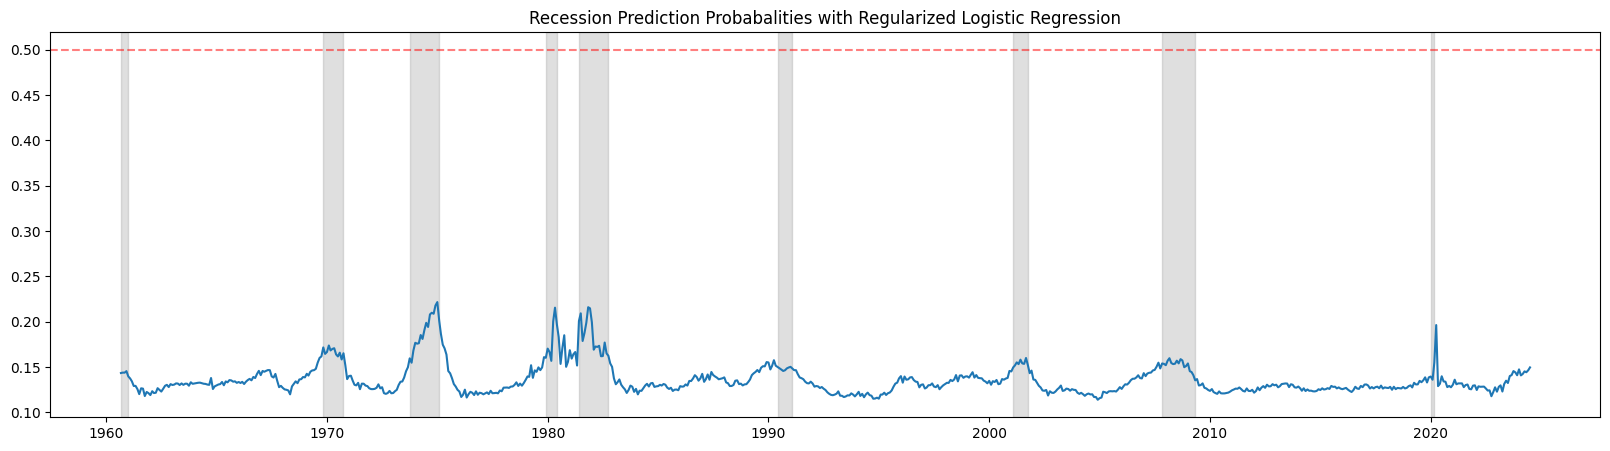

In [23]:
sample_range = pd.date_range(start='9/1/1960', end='7/1/2024', freq='MS')

plt.figure(figsize=(20,5))
plt.plot(sample_range.to_series().values, prob_predictions[:,0])
for i in range(len(rec_spans)):
    plt.axvspan(datetime.datetime.strptime(rec_spans[i][0], '%m/%d/%Y'), datetime.datetime.strptime(rec_spans[i][len(rec_spans[i]) - 1], '%m/%d/%Y'), alpha=0.25, color='grey')
plt.axhline(y=0.5, color='r', ls='dashed', alpha = 0.5)
plt.title('Recession Prediction Probabalities with Regularized Logistic Regression')
mp.savefig('assets/lr_regularization.png',  bbox_inches='tight')
plt.show()

## XGBoosting

In [24]:
xgboost = model_selection.GridSearchCV(estimator=xgb.XGBClassifier(),
                                       param_grid={'booster': ['gbtree']},
                                       scoring=scoring, cv=kfold).fit(df_training_features, 
                                                                      lb.fit_transform(df_training_targets)).best_estimator_
xgboost.fit(df_training_features, df_training_targets)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:

prob_predictions = xgboost.predict_proba(df_training_features)
prob_predictions = np.append(prob_predictions, xgboost.predict_proba(df_validation_features), axis=0)

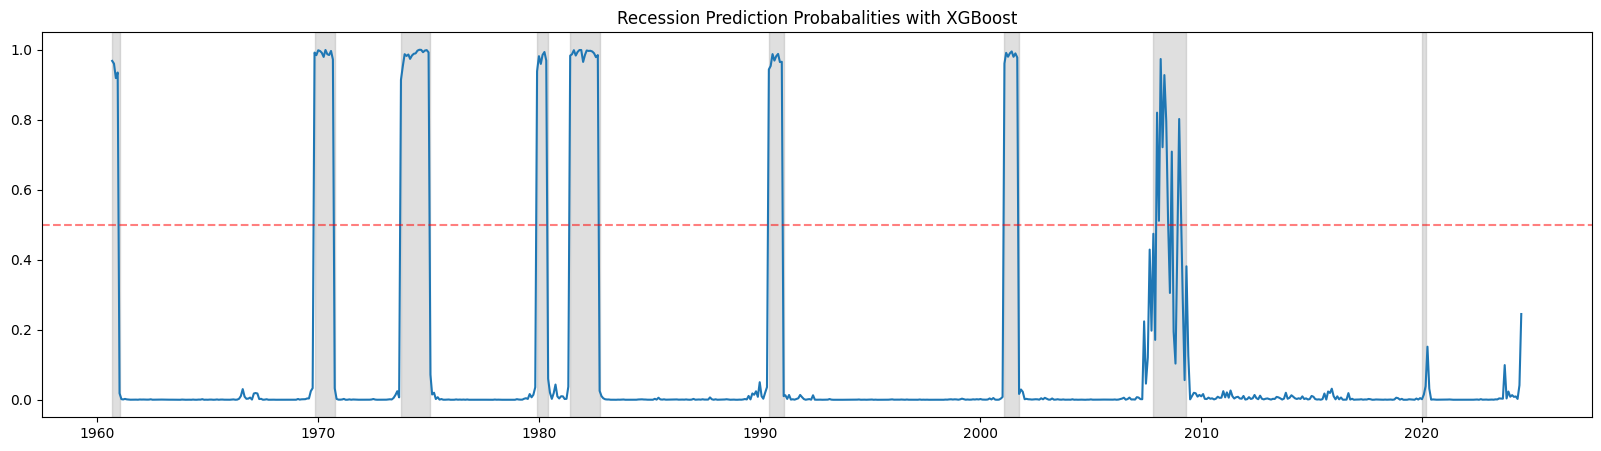

In [26]:
sample_range = pd.date_range(start='9/1/1960', end='7/1/2024', freq='MS')

plt.figure(figsize=(20,5))
plt.plot(sample_range.to_series().values, prob_predictions[:,0])
for i in range(len(rec_spans)):
    plt.axvspan(datetime.datetime.strptime(rec_spans[i][0], '%m/%d/%Y'), datetime.datetime.strptime(rec_spans[i][len(rec_spans[i]) - 1], '%m/%d/%Y'), alpha=0.25, color='grey')
plt.axhline(y=0.5, color='r', ls='dashed', alpha = 0.5)
plt.title('Recession Prediction Probabalities with XGBoost')
mp.savefig('assets/xgboost.png',  bbox_inches='tight')
plt.show()

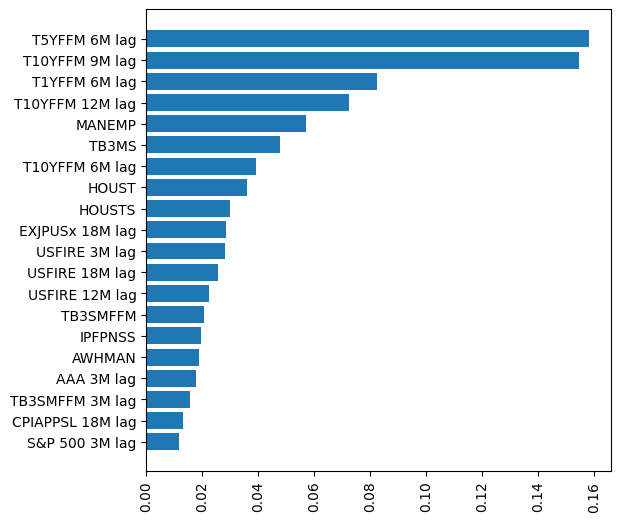

In [27]:
# find feature importances
headers = df.drop(['Regime','Label', 'Date'], axis=1).columns.values.tolist()
xgboost_importances = pd.DataFrame(xgboost.feature_importances_, index = headers, columns = ['Relative Importance'])
_ = xgboost_importances.sort_values(by = ['Relative Importance'], ascending = False, inplace=True)
xgboost_importances = xgboost_importances[xgboost_importances['Relative Importance']>0].iloc[:20]

# display importances in bar-chart and pie-chart
fig = plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
plt.barh(y=np.arange(len(xgboost_importances)), width=xgboost_importances['Relative Importance'], align='center', tick_label=xgboost_importances.index)
plt.gca().invert_yaxis()
mp.savefig('assets/feature_importance.png',  bbox_inches='tight')
plt.show()

xgbost auc 1.0


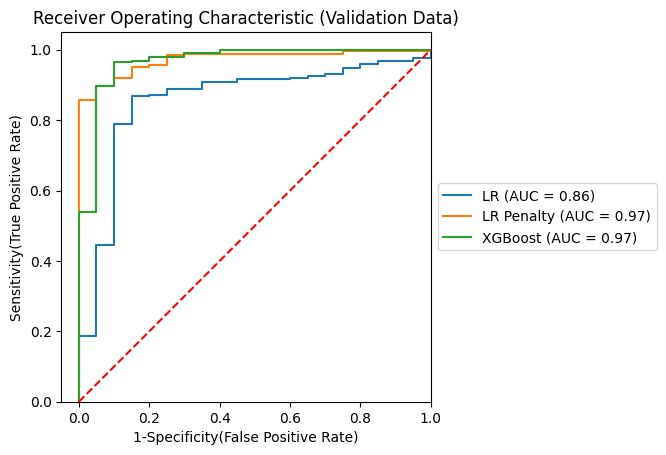

In [28]:
svc_disp =  RocCurveDisplay.from_estimator(LR, df_validation_features, df_validation_targets, name='LR')

RocCurveDisplay.from_estimator(LR_penalty, df_validation_features, df_validation_targets, name='LR Penalty', ax=svc_disp.ax_) 


RocCurveDisplay.from_estimator(xgboost, df_validation_features, df_validation_targets, name='XGBoost' , ax=svc_disp.ax_)
print("xgbost auc", auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic (Validation Data)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
mp.savefig('assets/ROC1.png',  bbox_inches='tight')
plt.show() 

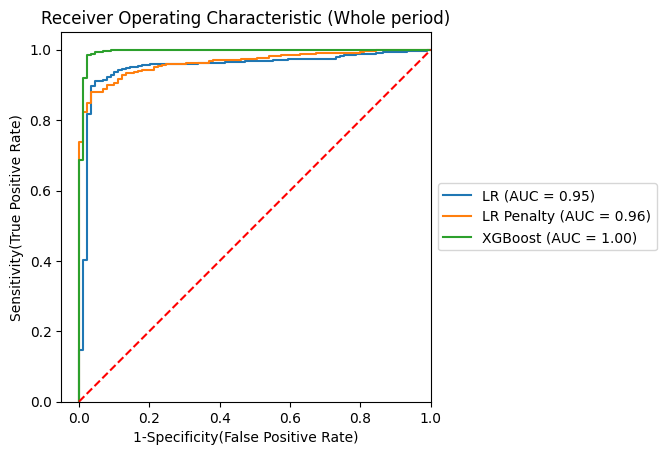

In [29]:
# Whole period
lr_disp =  RocCurveDisplay.from_estimator(LR, df_features, df_targets, name='LR')

RocCurveDisplay.from_estimator(LR_penalty, df_features, df_targets, name='LR Penalty', ax=lr_disp.ax_)

RocCurveDisplay.from_estimator(xgboost, df_features, df_targets, name='XGBoost', ax=lr_disp.ax_)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic (Whole period)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
mp.savefig('assets/ROC2.png',  bbox_inches='tight')
plt.show() 